# Эксперименты для проверки гипотезы

Было произведено извлечение матрицы признаков eGeMAPS из файла 03a05Wa.wav датасета EmoDB (мужчина, гнев) двумя способами:

 --Пофреймовая запись в файл 23х низкоуровневых дескрипторов (файл *features\\features_framewise_llds.csv*)
 
 --Вычисление всех параметров на плавающих отрезках длиной 0.2сек с шириной шага 0.1сек (файл *features\\features_functionals_over_windows.csv*)
 
Анализ этих файлов приведен ниже.

In [1]:
# Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prep
%matplotlib inline
import librosa.display
import IPython.display as ipd

Matplotlib is building the font cache; this may take a moment.


## Аудиофайл, с которым мы работаем

In [2]:
# Load audio file
y, sr = librosa.load('03a05Wa.wav')
ipd.Audio(y, rate=sr)

In [3]:
duration = librosa.get_duration(filename='03a05Wa.wav')
samples_count = int(sr * duration)
samples = np.arange(samples_count)
t = librosa.core.samples_to_time(samples, sr=sr)
t = np.append(arr=t, values=t[-1]-t[-2])

## Его waveform

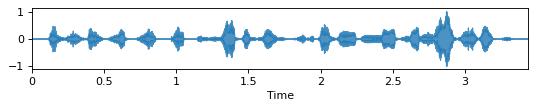

In [4]:
# Plot waveform for reference
plt.figure(num=None, figsize=(8, 1), dpi=80, facecolor='w', edgecolor='k')
librosa.display.waveplot(y, sr, alpha=0.8)

## 1. Пофреймовая запись.

### 1.1. Загрузка и подготовка данных

In [5]:
# Load .csv
df = pd.read_csv('features\\features_framewise_llds.csv', delimiter=';')

In [6]:
# Drop unnecessery columns
df = df.drop(['name', 'frameTime'], axis=1)

In [7]:
df.shape

(340, 23)

Получили матрицу 340х23

In [8]:
# Create a transposed version of df for convenience
dft = df.transpose()

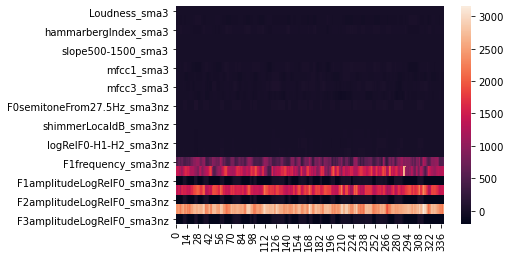

In [9]:
# Try to plot a heatmap on transposed df
sns.heatmap(dft)

**!!!!НЕОБХОДИМА Z-НОРМАЛИЗАЦИЯ ДАННЫХ, ИЛИ МИН-МАКС НОРМАЛИЗАЦИЯ КАЖДОГО СТОЛБЦА!!!!**

In [10]:
normalized_df=(df-df.mean())/df.std()
df = normalized_df
dft = df.transpose()

### 1.2. Визуализация данных

#### 1.2.1. HEATMAP полученной матрицы данных 

##### а) z-нормализация

Text(0.5, 1.0, 'Heatmap')

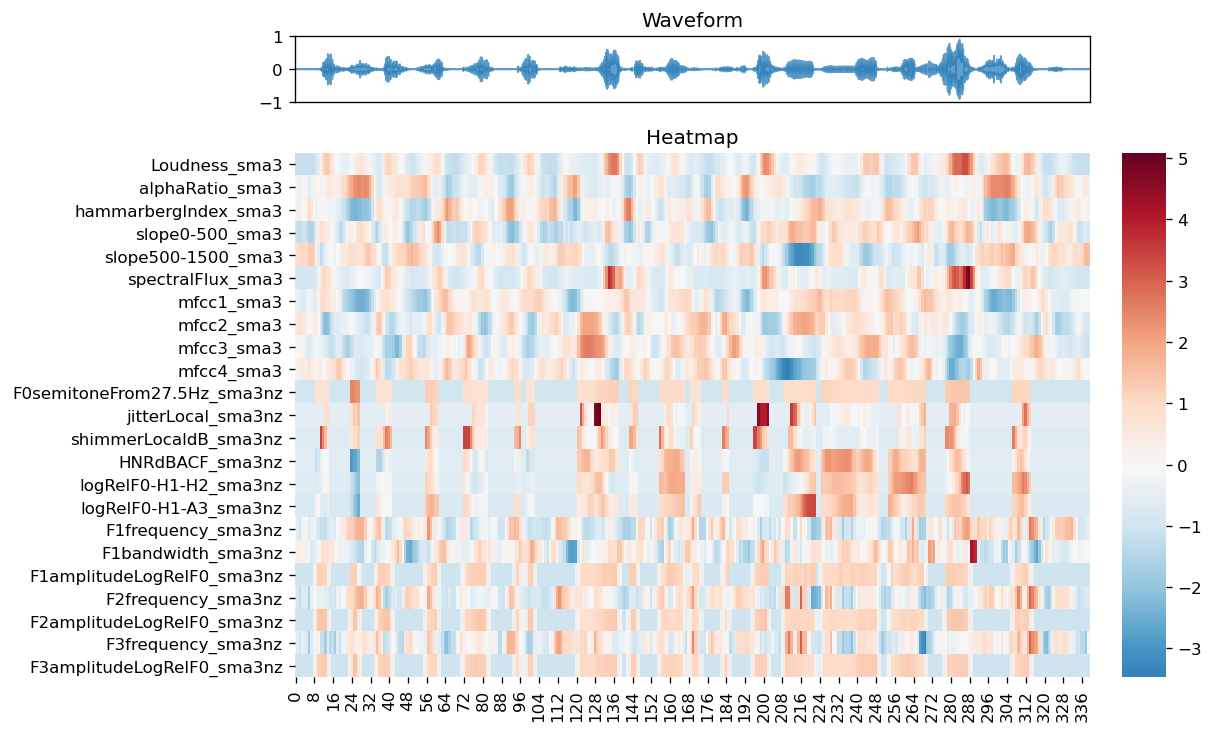

In [11]:
fig = plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='k', constrained_layout=True)
heights = [1, 8]
spec = fig.add_gridspec(ncols=1, nrows=2,
                          height_ratios=heights)
ax_waveform = fig.add_subplot(spec[0, 0])
ax_waveform = librosa.display.waveplot(y, sr, alpha=0.7, x_axis='none')
ax_heatmap = fig.add_subplot(spec[1, 0])
sns.heatmap(dft, center=0, ax=ax_heatmap, cmap='RdBu_r')
ax_waveform = ax_waveform.axes
ax_waveform.set_title('Waveform')
ax_heatmap.set_title('Heatmap')

##### б) Мин-макс нормализация по столбцам

In [6]:
df = pd.read_csv('features\\features_framewise_llds.csv', delimiter=';')
df = df.drop(['name', 'frameTime'], axis=1)
columns_list = df.columns.tolist()

In [7]:
for col in columns_list:
    normalized_col_values = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    df[col] = normalized_col_values

Text(0.5, 1.0, 'Heatmap')

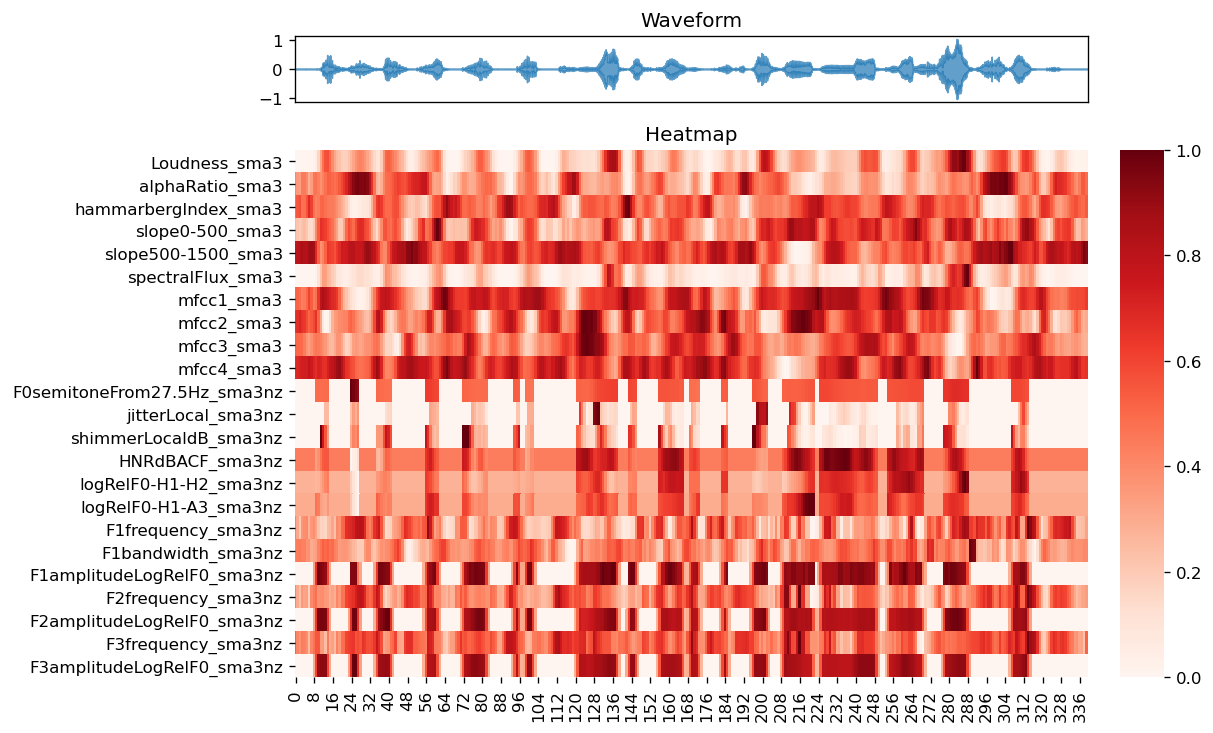

In [10]:
dft = df.transpose()
fig = plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='k', constrained_layout=True)
heights = [1, 8]
spec = fig.add_gridspec(ncols=1, nrows=2,
                          height_ratios=heights)
ax_waveform = fig.add_subplot(spec[0, 0])
ax_waveform = librosa.display.waveplot(y, sr, alpha=0.7, x_axis='none')
ax_heatmap = fig.add_subplot(spec[1, 0])
sns.heatmap(dft, ax=ax_heatmap, cmap='Reds')
ax_waveform = ax_waveform.axes
ax_waveform.set_title('Waveform')
ax_heatmap.set_title('Heatmap')

#### 1.2.2. ГРАФИКИ ФИЧЕЙ ОТ ВРЕМЕНИ

In [12]:
df = pd.read_csv('features\\features_framewise_llds.csv', delimiter=';')
df = df.drop('name', axis=1)
columns_list = df.drop('frameTime', axis=1).columns.tolist()

**Для каждой фичи произведено скалирование в пределах от 0 до 1.
График фичи показан на одних осях с графиком waveform.**

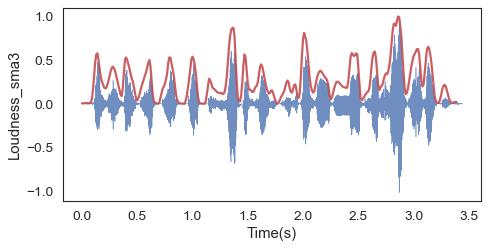

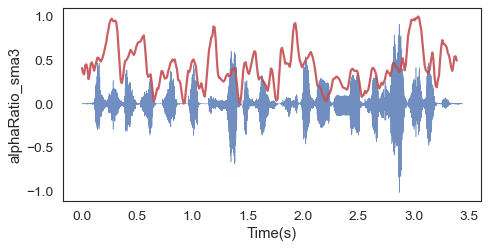

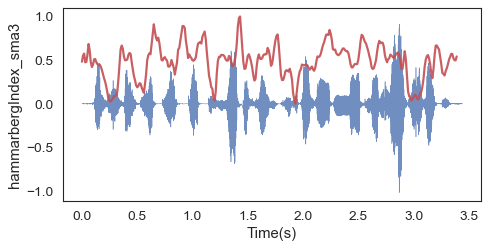

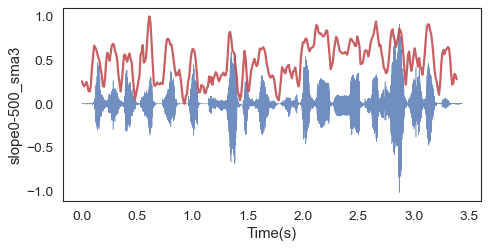

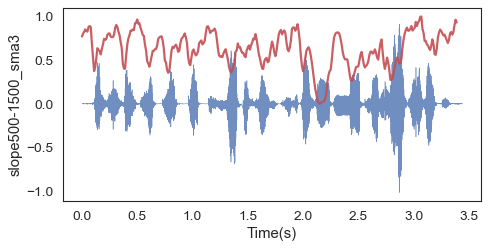

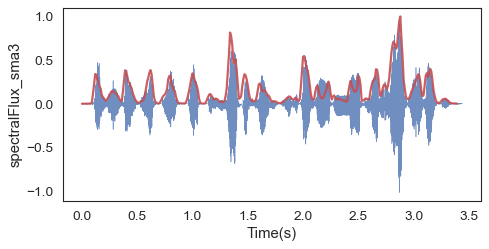

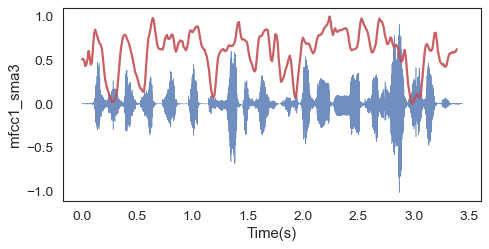

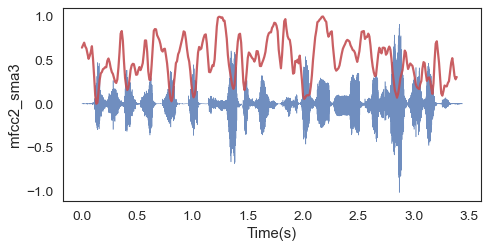

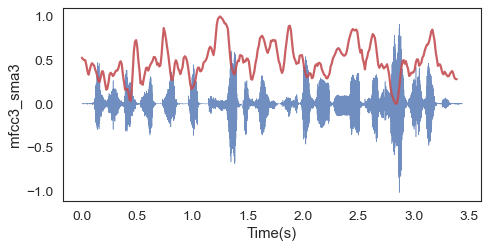

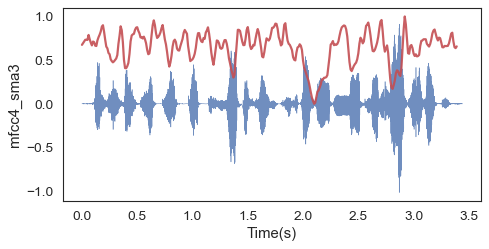

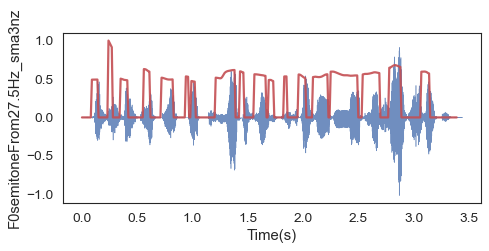

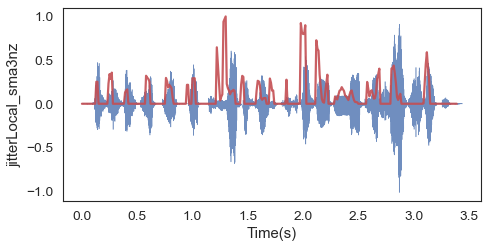

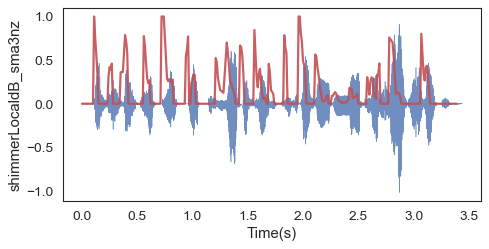

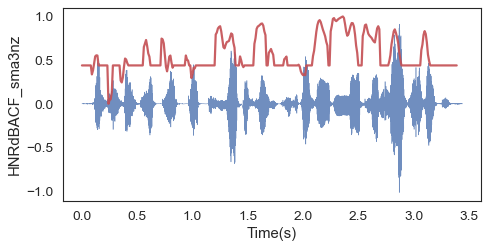

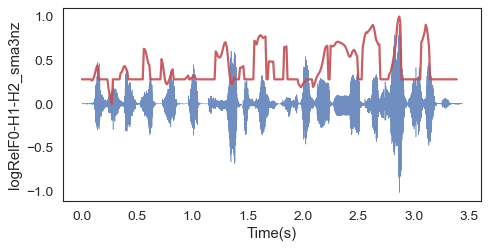

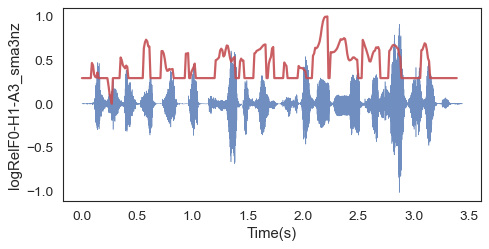

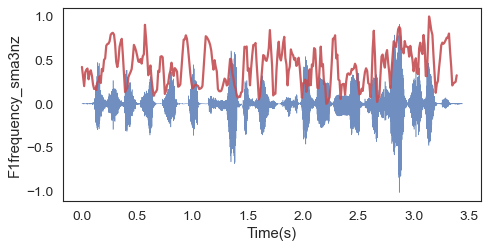

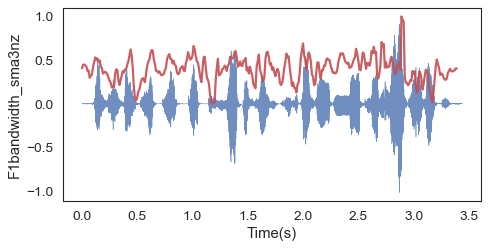

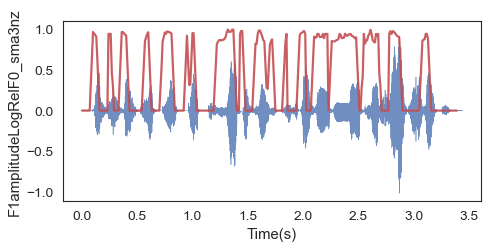

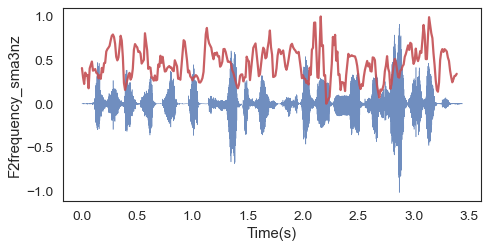

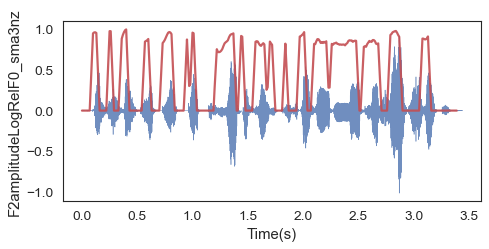

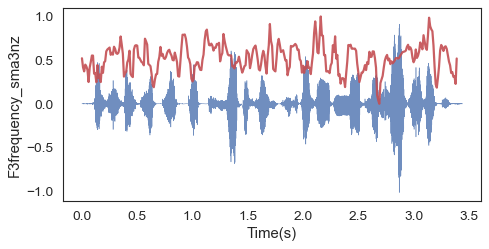

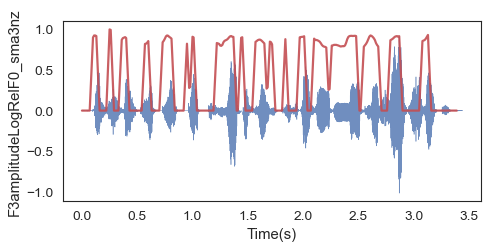

In [13]:
for col in columns_list:
    fig = plt.figure(figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k', constrained_layout=True)
    sns.set(style="white", context="paper", font_scale=1.4)
    normalized_col_values = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    sns.lineplot(x=t, y=y, alpha=0.8, linewidth=0.5)
    sns.lineplot(data=df, x='frameTime', y=normalized_col_values, linewidth=2, color='r', alpha=0.9)
    plt.xlabel('Time(s)')
    plt.show()

## 2. Вычисление параметров на отрезках длиной 0.2сек с шириной шага 0.16сек.

### 1.1. Загрузка и подготовка данных

In [14]:
# Load .csv
df = pd.read_csv('features\\features_functionals_over_windows.csv', delimiter=';')
# Drop unnecessery columns
df = df.drop(['name', 'frameTime'], axis=1)
df.shape

(54, 88)

Получили матрицу 54х88

In [15]:
# Create a transposed version of df for convenience
dft = df.transpose()
# Z-normalization
normalized_df=(df-df.mean())/df.std()
df = normalized_df
dft = df.transpose()

### 1.2. Heatmap

##### а) z-нормализация

Text(0.5, 1.0, 'Heatmap')

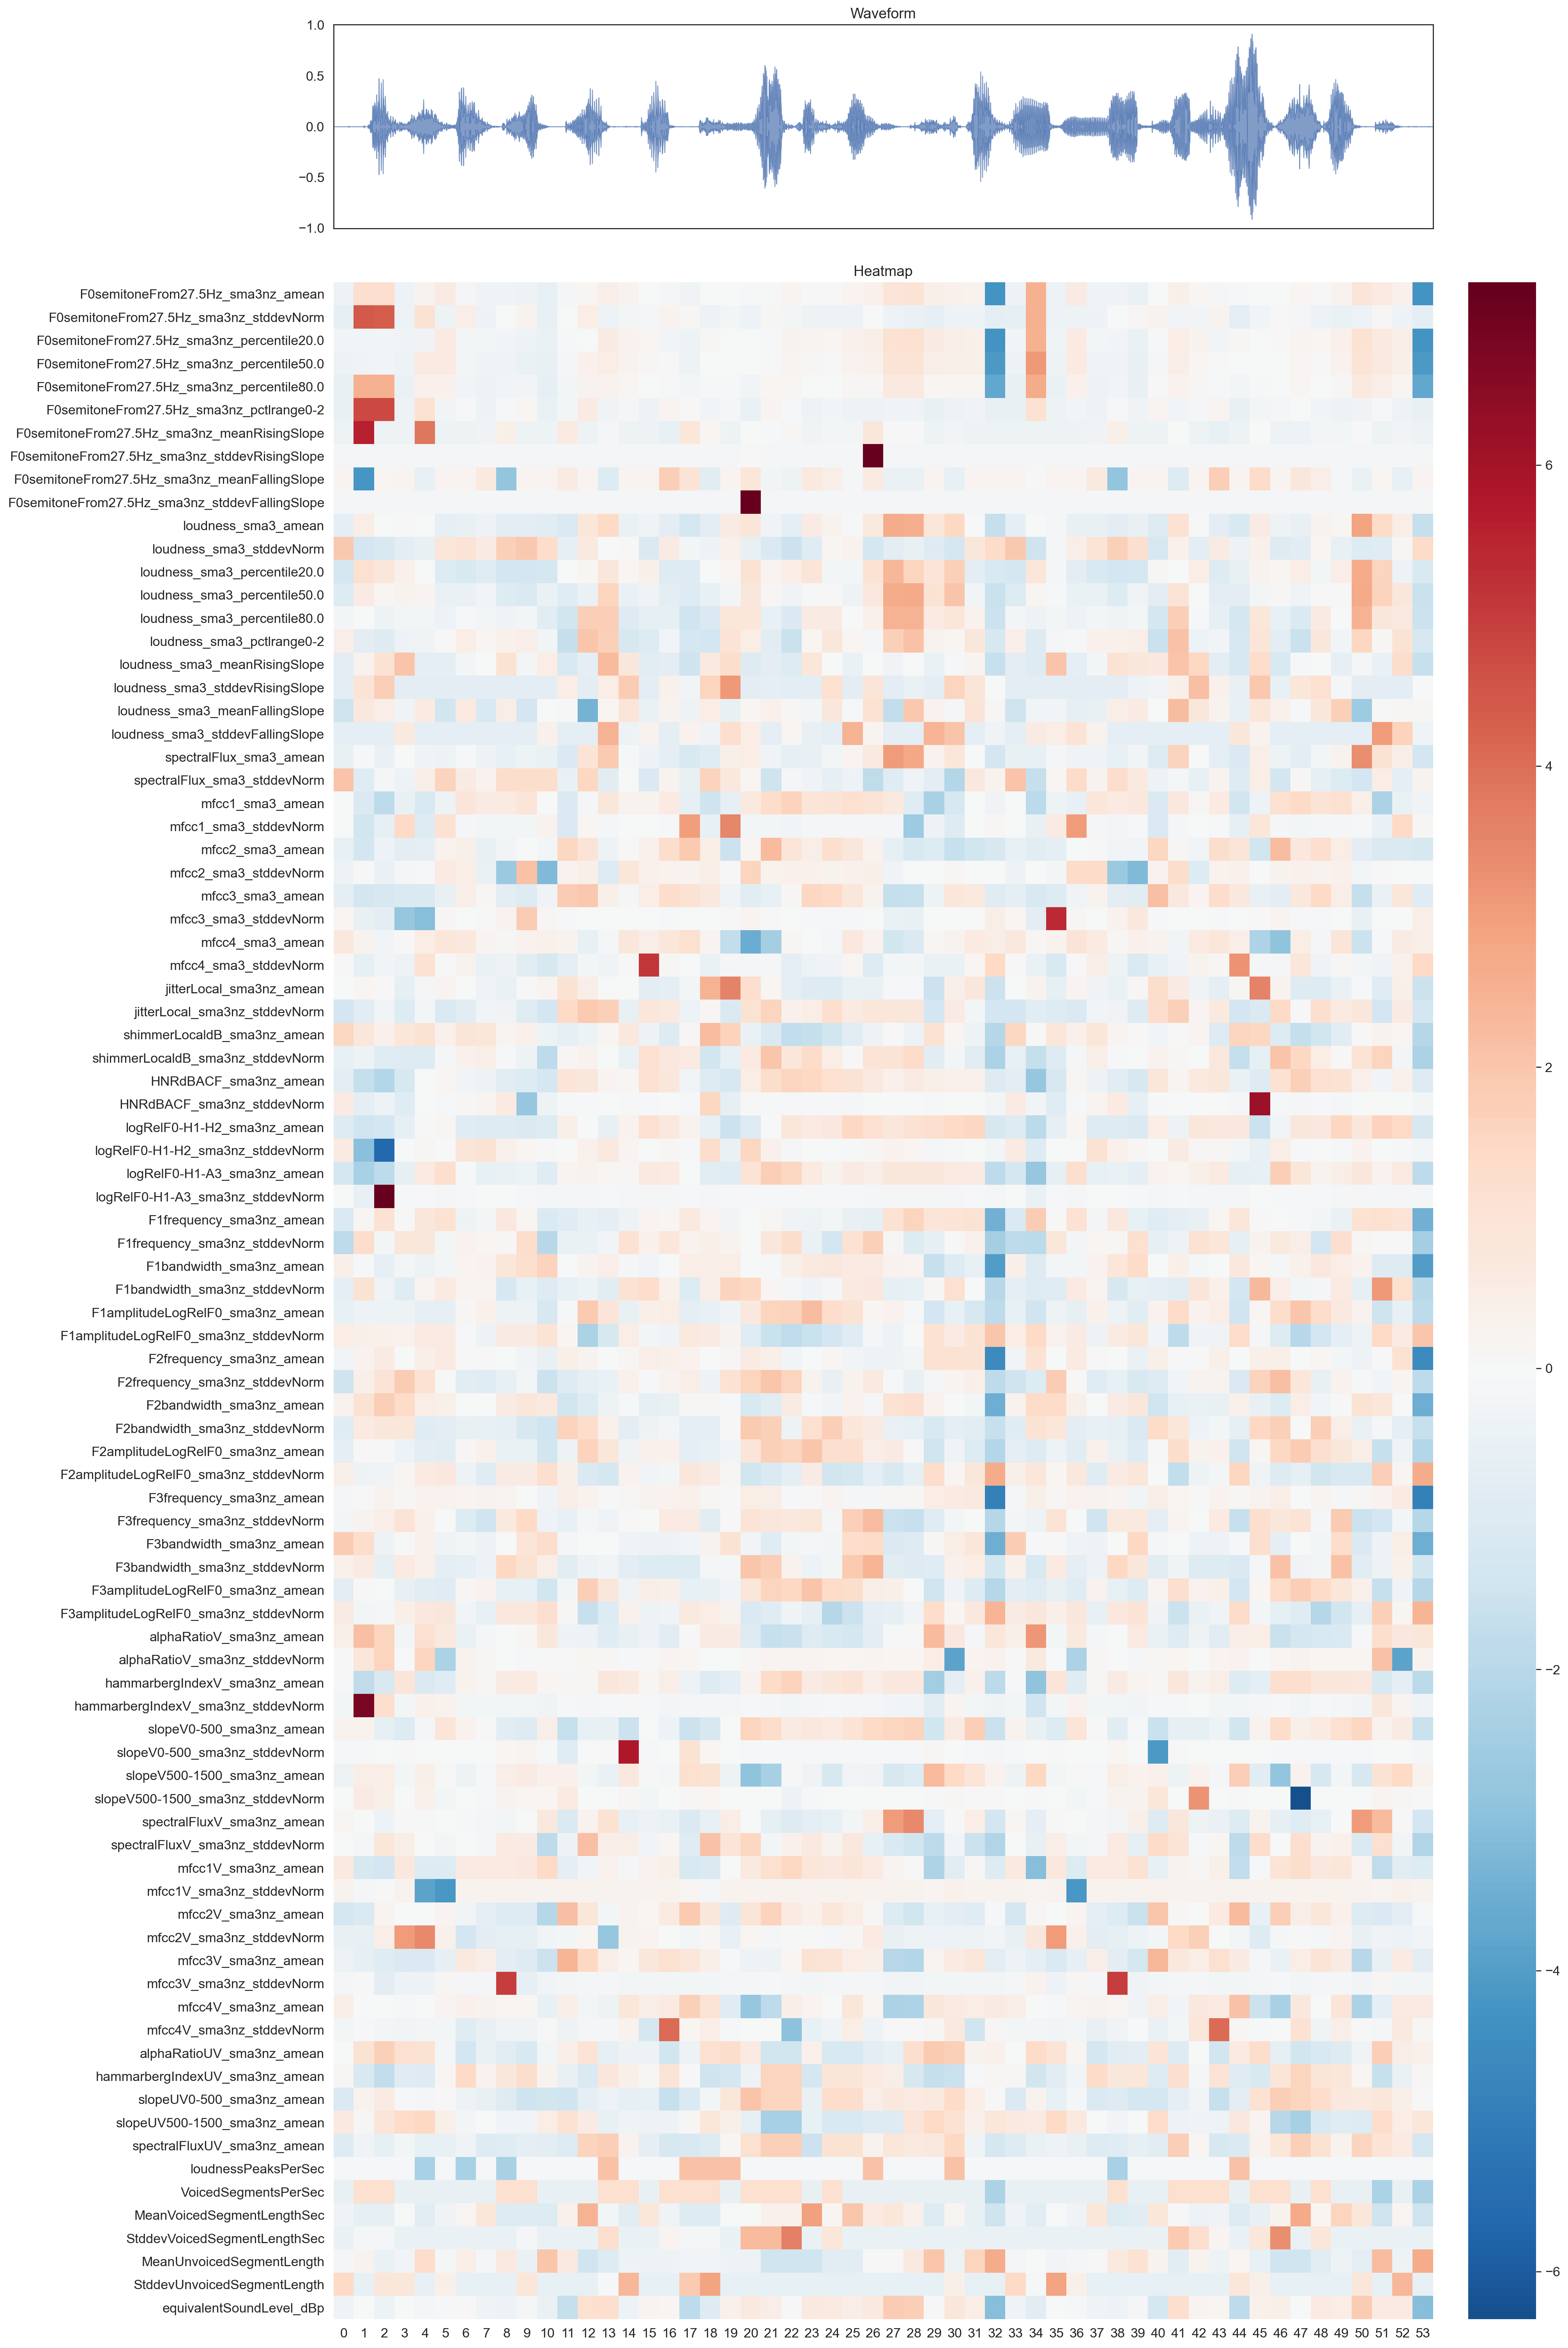

In [16]:
fig = plt.figure(figsize=(20, 30), dpi=200, facecolor='w', edgecolor='k', constrained_layout=True)
heights = [1, 10]
spec = fig.add_gridspec(ncols=1, nrows=2,
                          height_ratios=heights)
ax_waveform = fig.add_subplot(spec[0, 0])
ax_waveform = librosa.display.waveplot(y, sr, alpha=0.7, x_axis='none')
ax_heatmap = fig.add_subplot(spec[1, 0])
sns.heatmap(dft, center=0, ax=ax_heatmap, cmap='RdBu_r')
ax_waveform = ax_waveform.axes
ax_waveform.set_title('Waveform')
ax_heatmap.set_title('Heatmap')

##### б) Мин-макс нормализация по столбцам

In [11]:
df = pd.read_csv('features\\features_functionals_over_windows.csv', delimiter=';')
df = df.drop(['name', 'frameTime'], axis=1)
columns_list = df.columns.tolist()

In [13]:
for col in columns_list:
    normalized_col_values = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    df[col] = normalized_col_values

Text(0.5, 1.0, 'Heatmap')

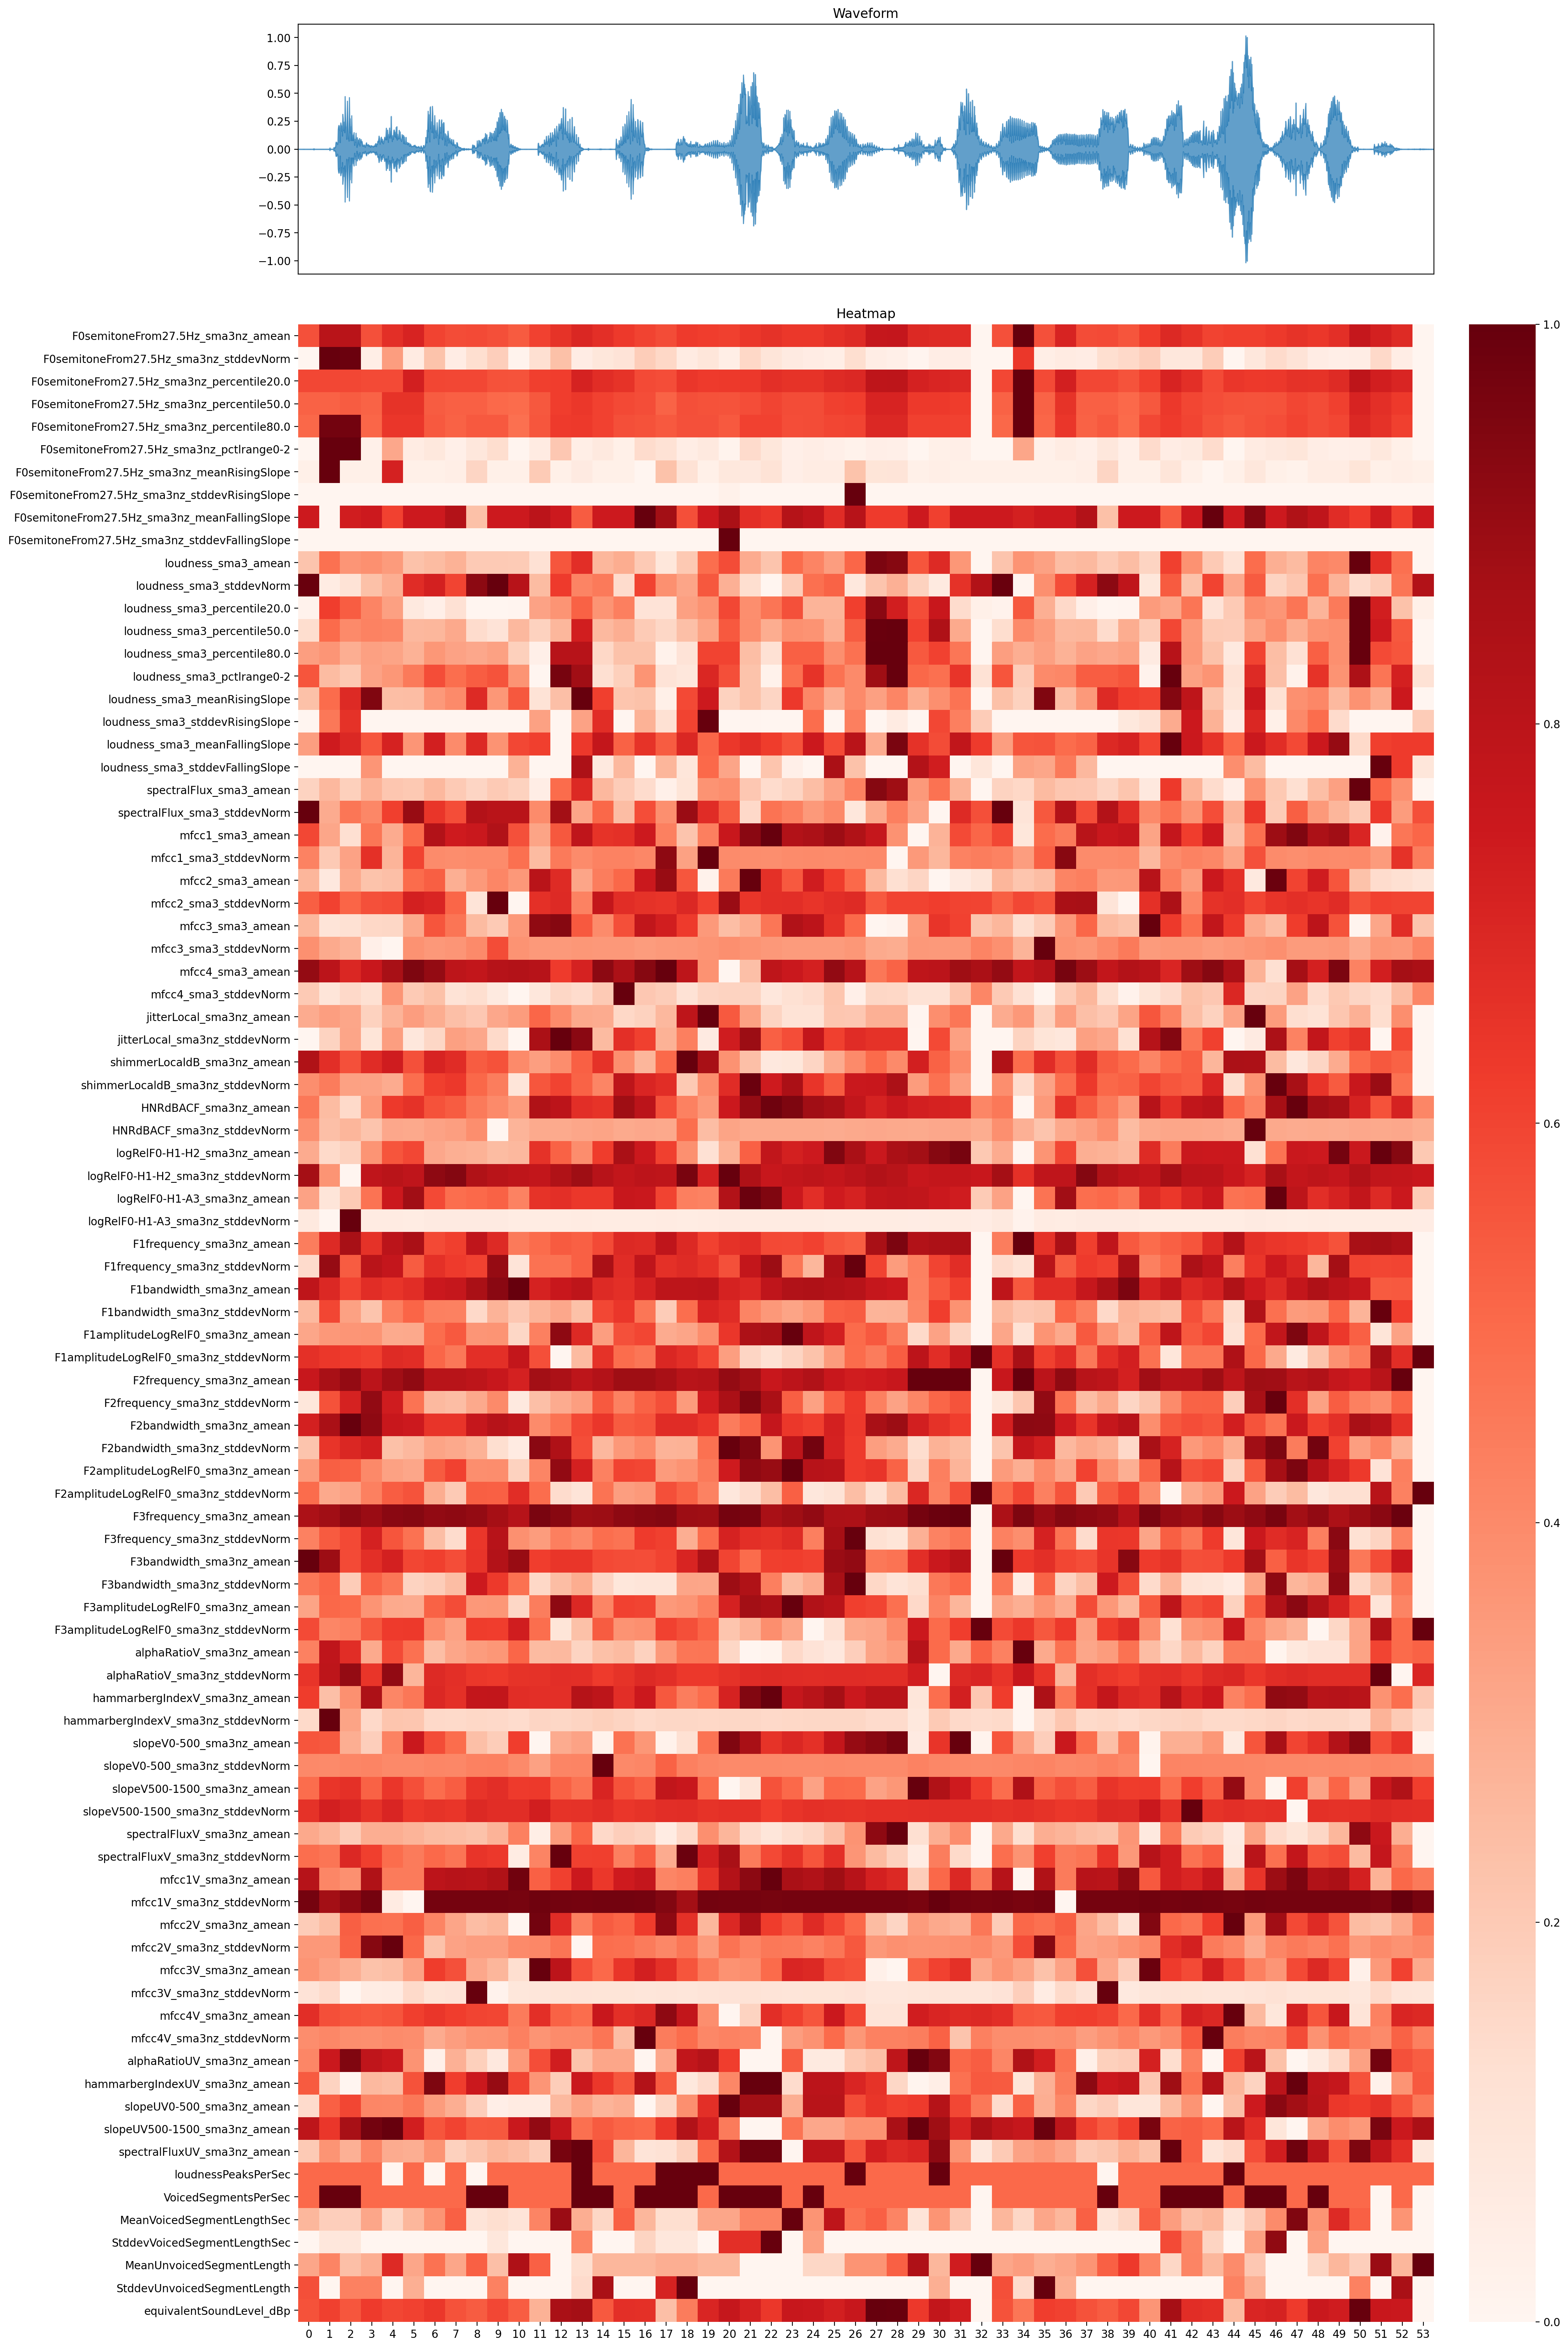

In [21]:
dft = df.transpose()
fig = plt.figure(figsize=(20, 30), dpi=200, facecolor='w', edgecolor='k', constrained_layout=True)
heights = [1, 8]
spec = fig.add_gridspec(ncols=1, nrows=2,
                          height_ratios=heights)
ax_waveform = fig.add_subplot(spec[0, 0])
ax_waveform = librosa.display.waveplot(y, sr, alpha=0.7, x_axis='none')
ax_heatmap = fig.add_subplot(spec[1, 0])
sns.heatmap(dft, ax=ax_heatmap, cmap='Reds')
ax_waveform = ax_waveform.axes
ax_waveform.set_title('Waveform')
ax_heatmap.set_title('Heatmap')

### 1.3. Графики фичей от времени

In [17]:
df = pd.read_csv('features\\features_functionals_over_windows.csv', delimiter=';')
df = df.drop('name', axis=1)
columns_list = df.drop('frameTime', axis=1).columns.tolist()

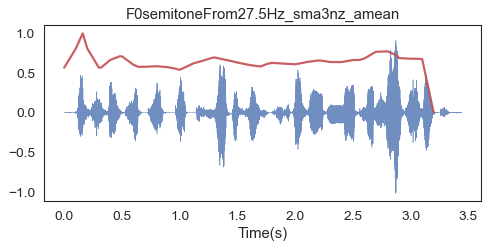

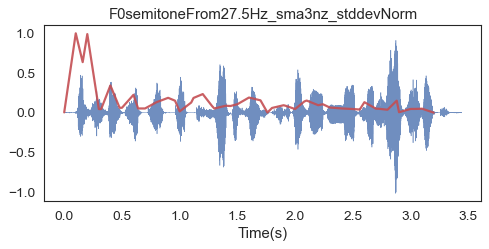

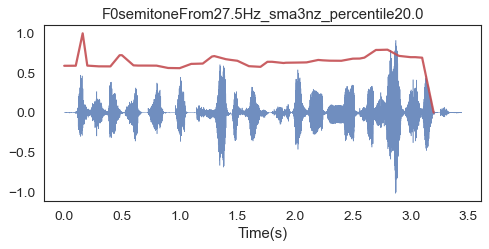

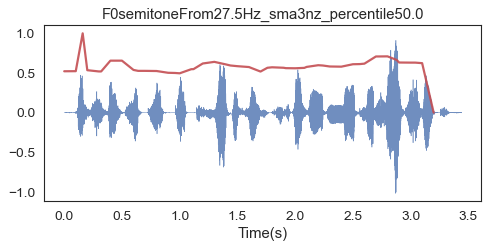

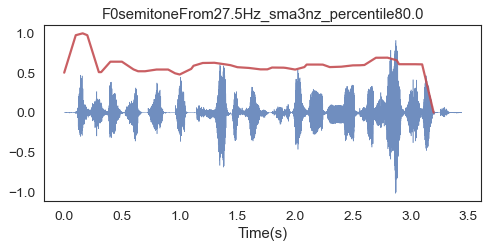

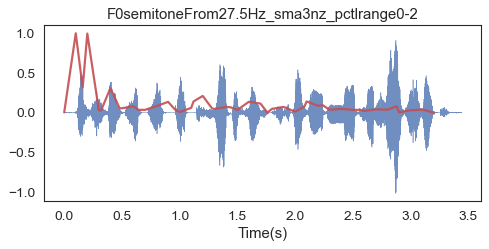

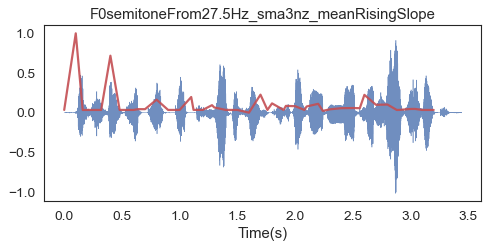

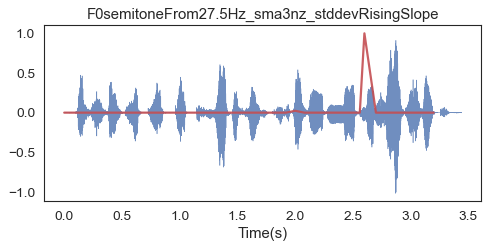

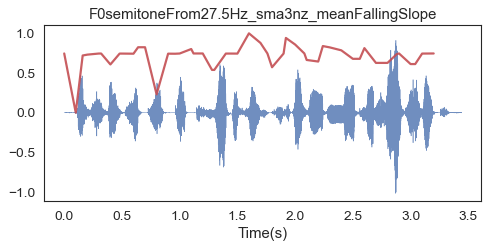

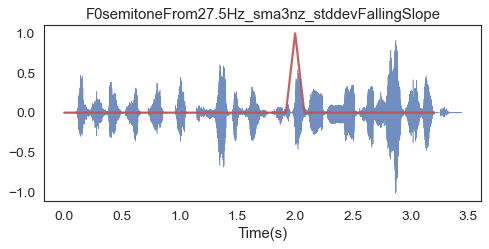

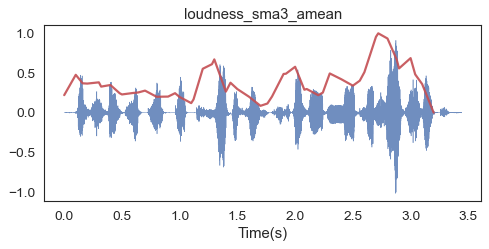

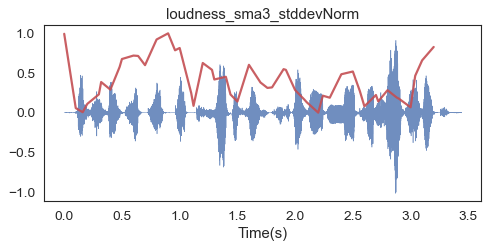

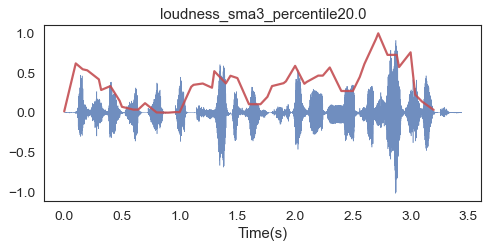

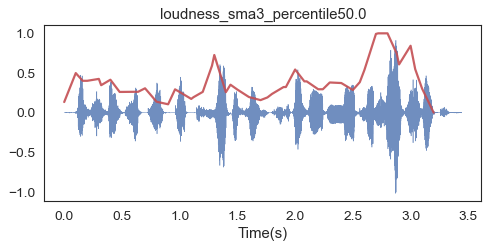

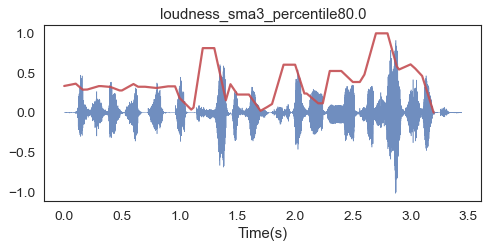

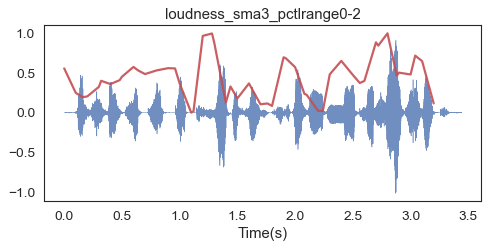

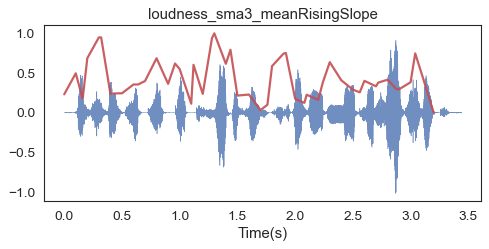

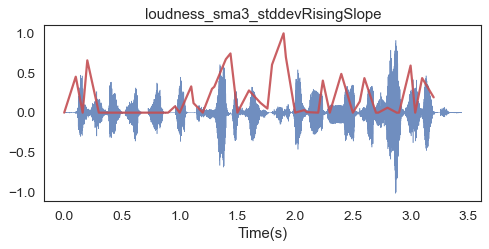

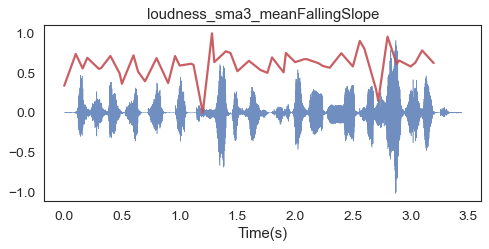

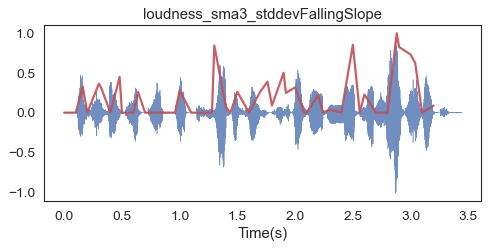

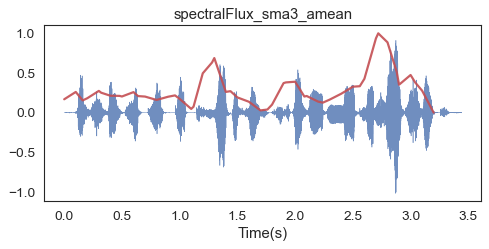

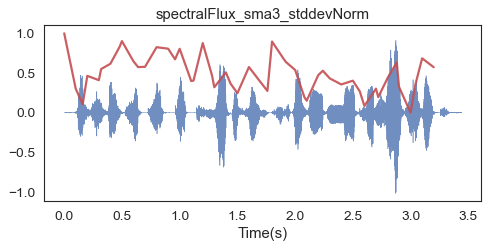

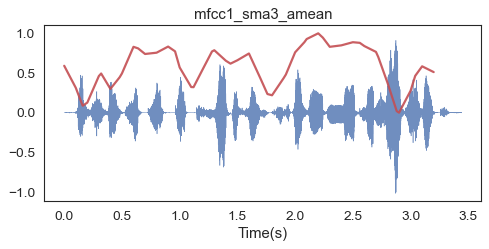

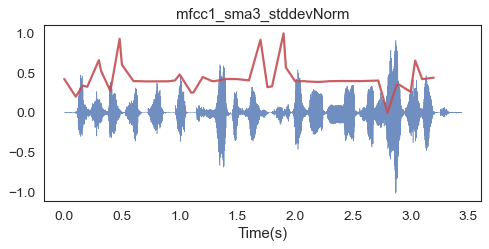

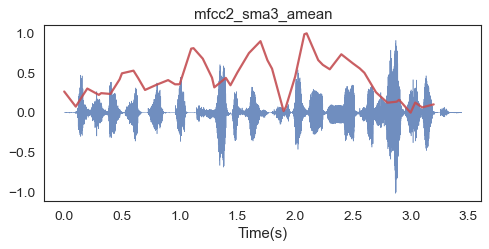

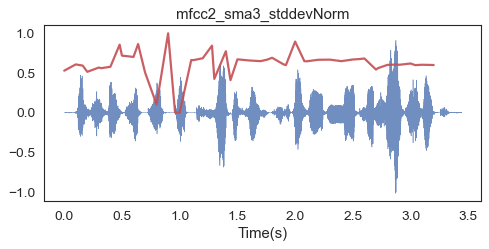

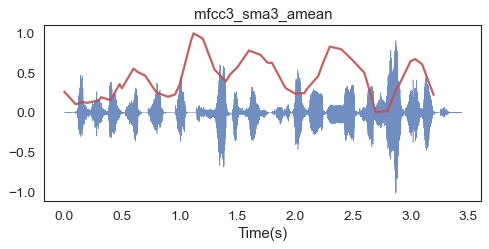

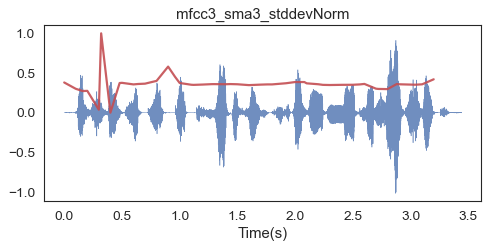

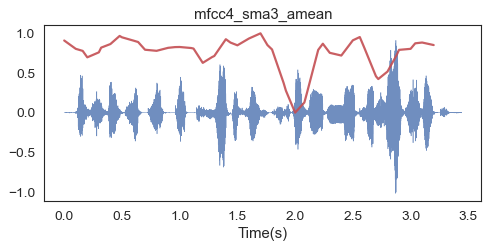

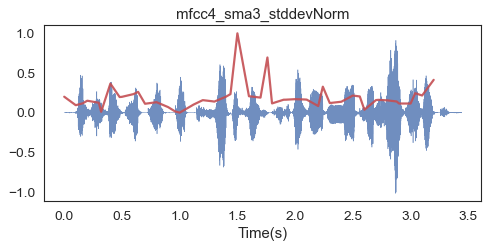

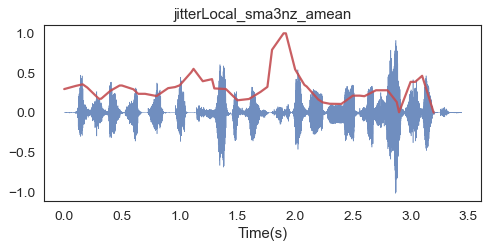

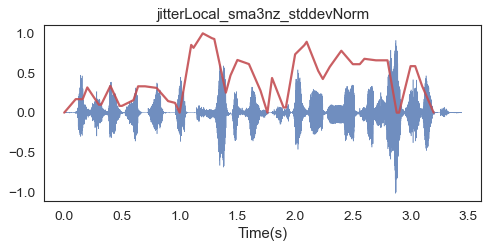

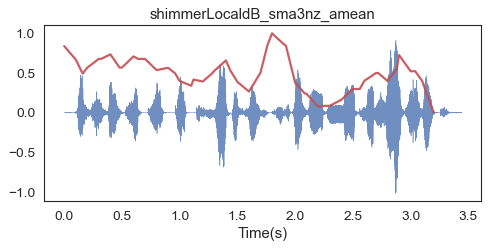

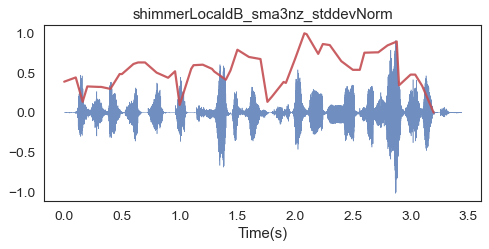

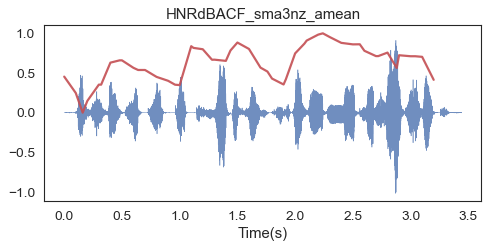

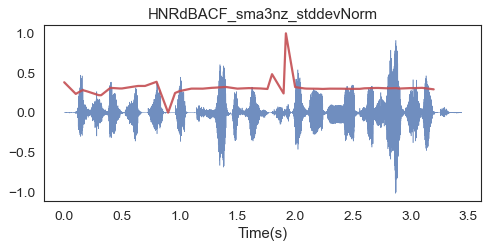

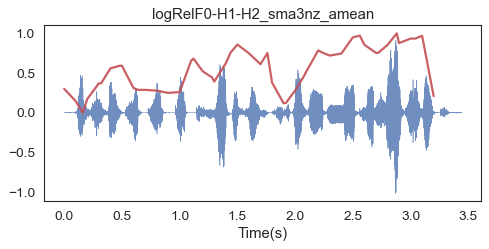

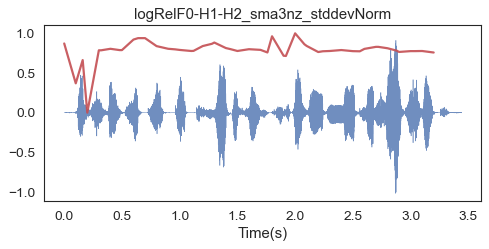

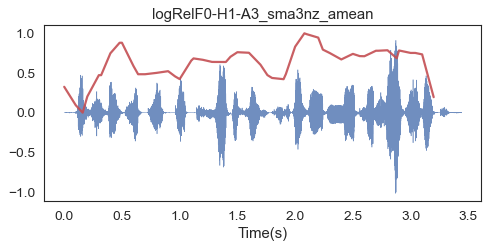

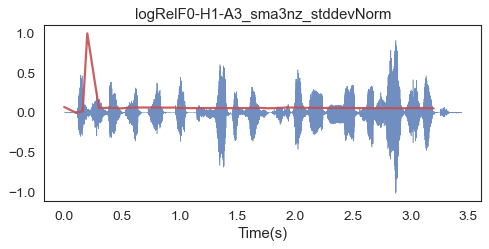

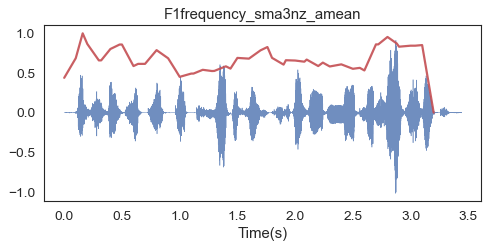

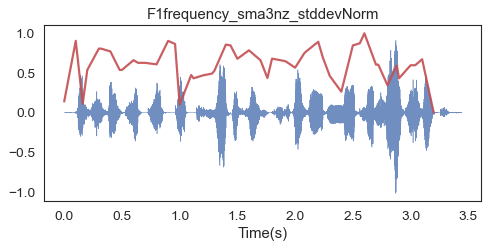

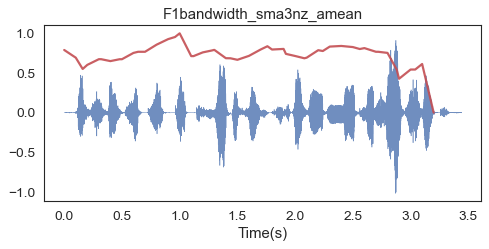

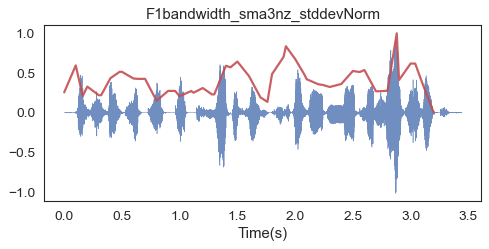

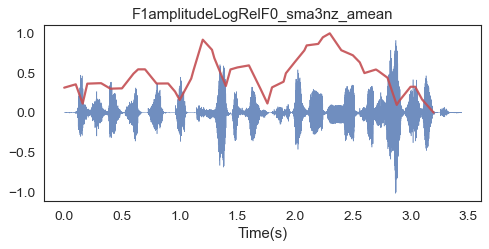

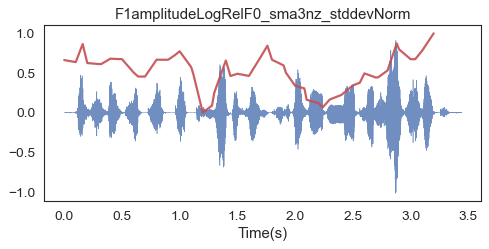

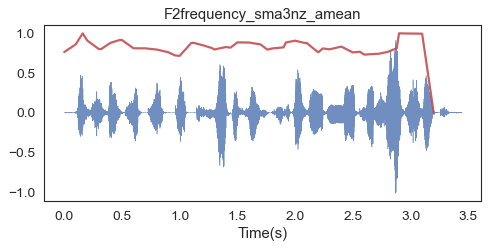

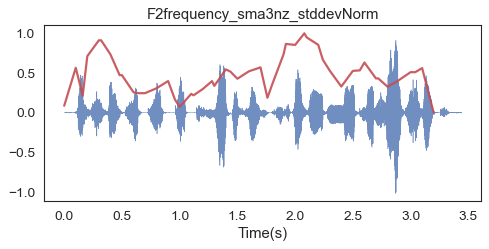

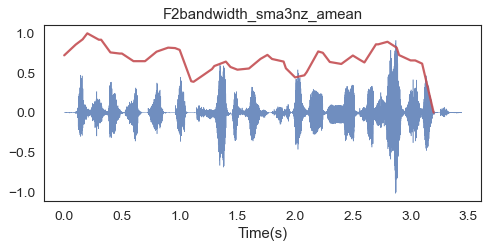

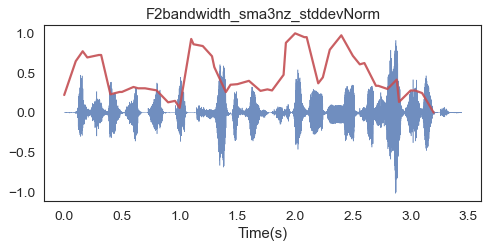

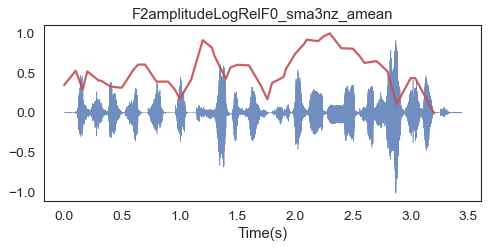

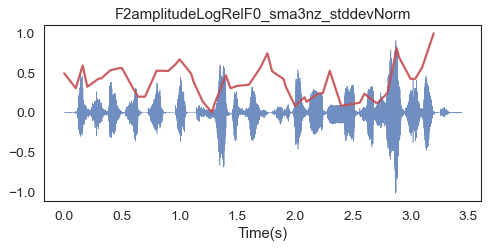

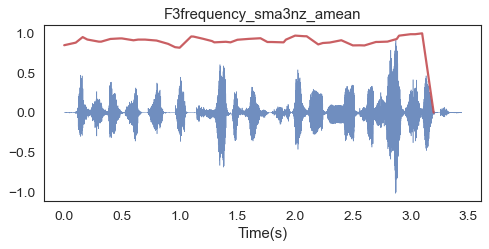

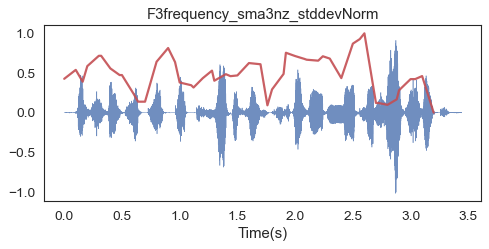

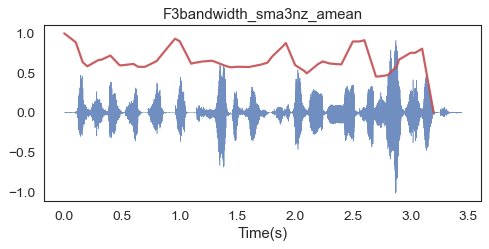

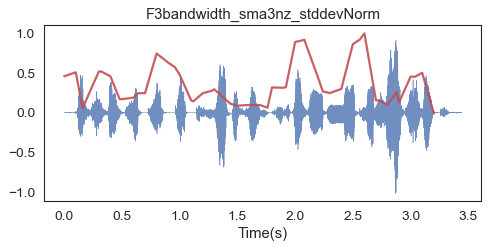

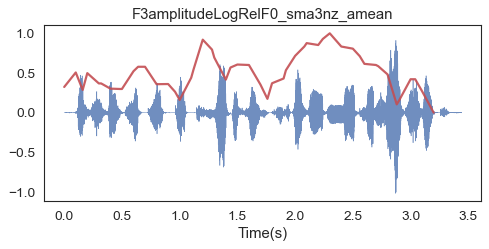

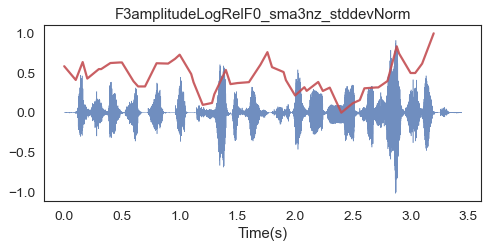

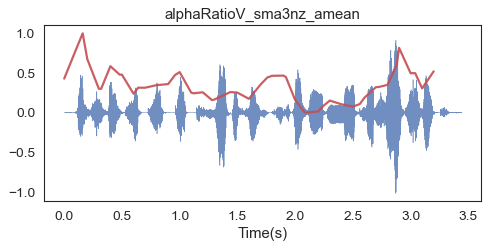

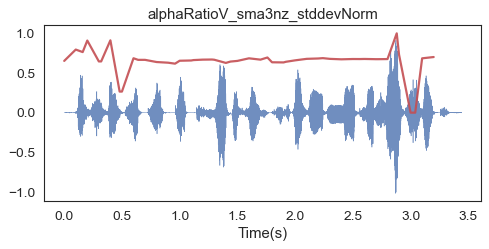

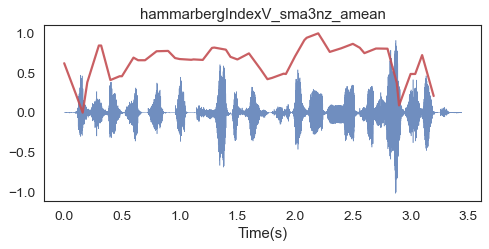

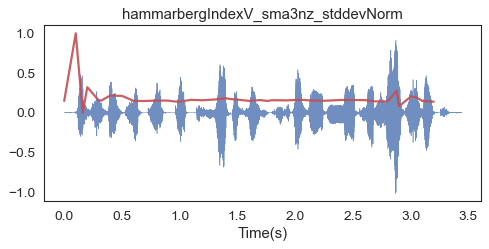

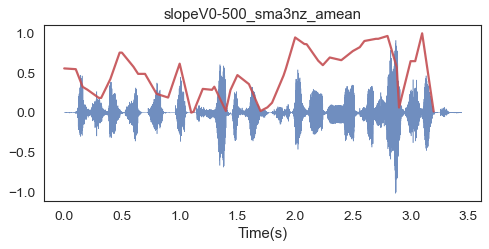

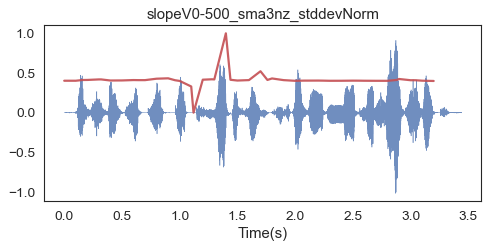

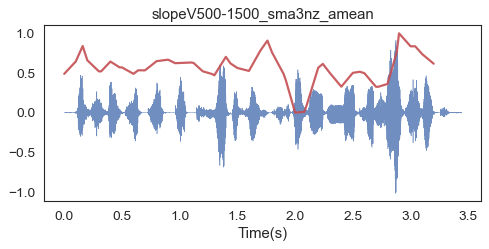

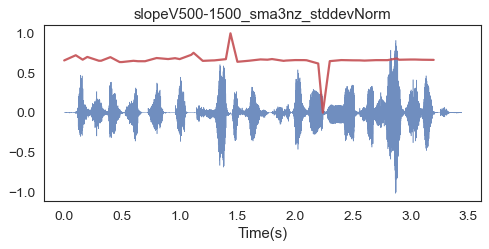

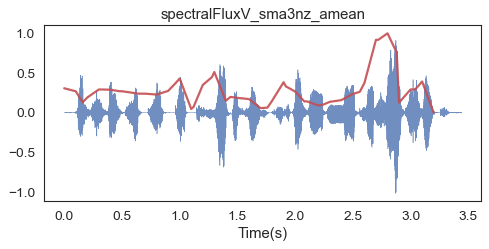

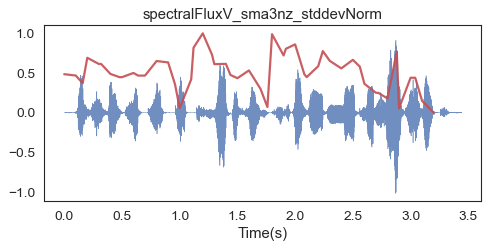

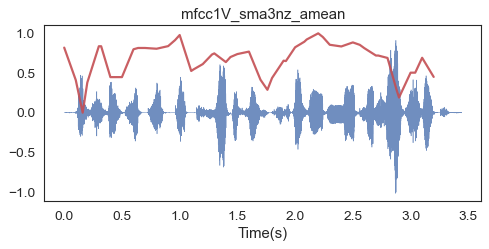

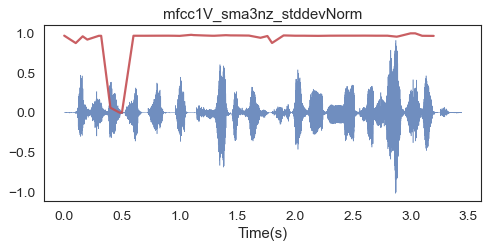

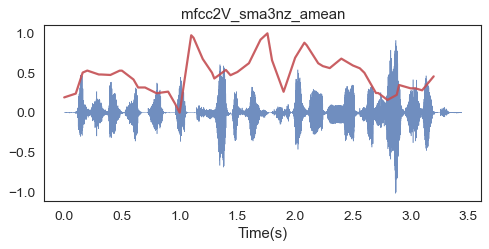

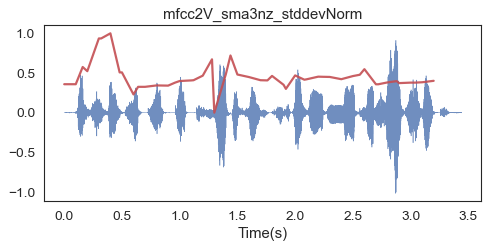

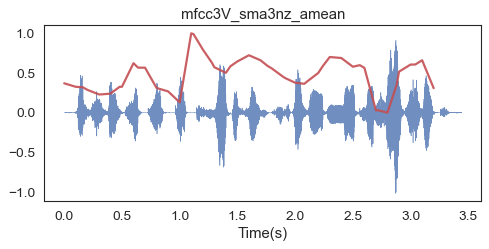

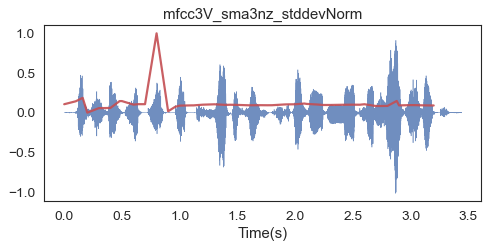

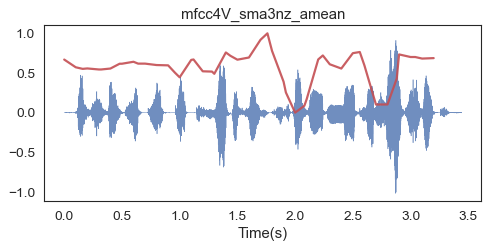

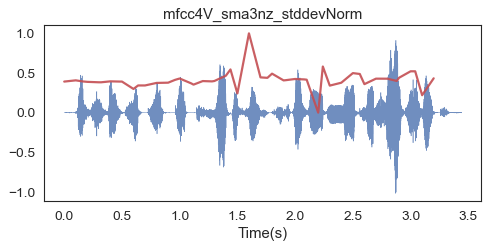

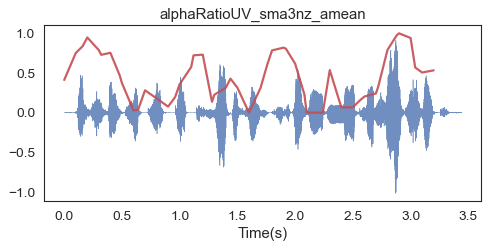

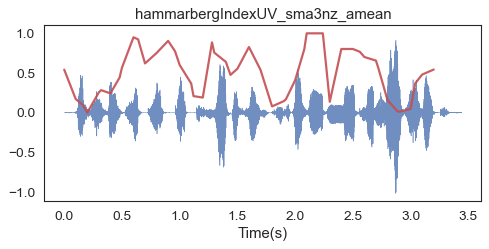

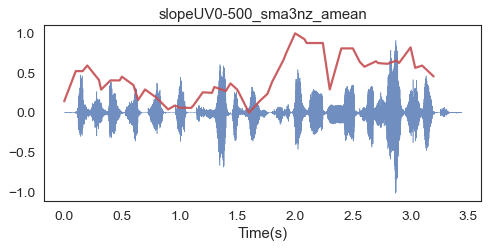

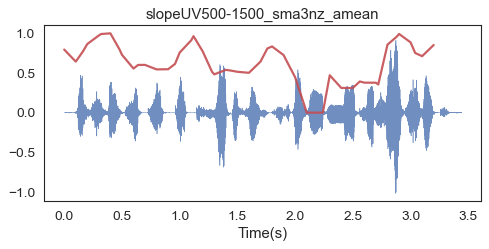

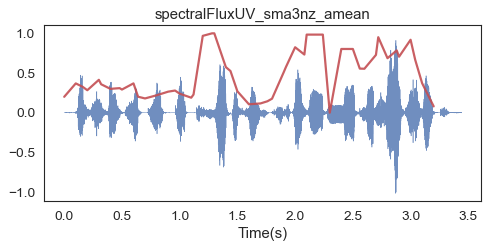

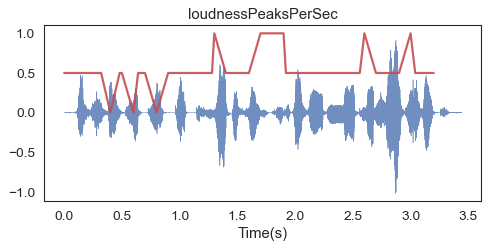

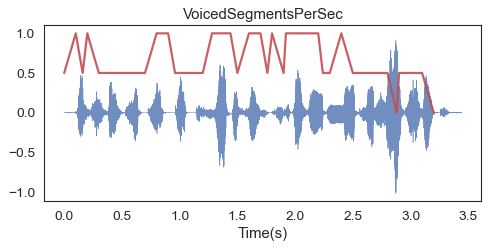

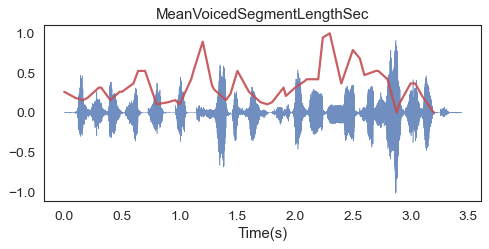

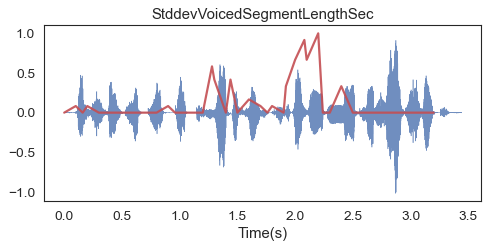

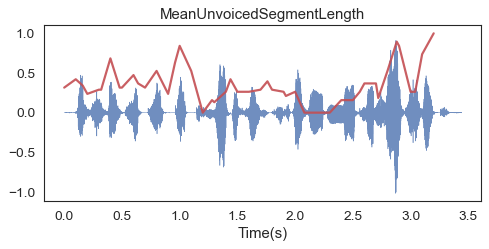

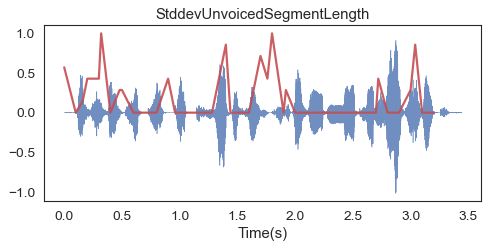

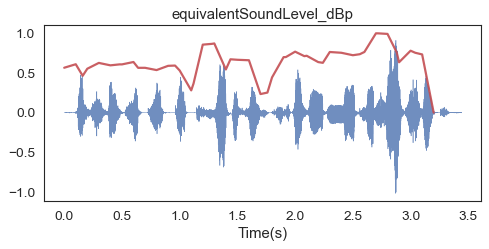

In [18]:
for col in columns_list:
    fig = plt.figure(figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k', constrained_layout=True)
    sns.set(style="white", context="paper", font_scale=1.4)
    normalized_col_values = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    sns.lineplot(x=t, y=y, alpha=0.8, linewidth=0.5)
    sns.lineplot(data=df, x='frameTime', y=normalized_col_values, linewidth=2, color='r', alpha=0.9)
    plt.xlabel('Time(s)')
    plt.ylabel('')
    plt.title(col)
    plt.show()